In [ ]:
import os

## Diretórios de entrada e saída
diretorio_entrada = 'data/nlp'
diretorio_saida_normalizado = 'data/nlp_normalized'

# Percorrer arquivos de texto no diretório de entrada
for pasta_raiz, _, arquivos in os.walk(diretorio_entrada):
    for arquivo in arquivos:
        if arquivo.endswith('.txt'):
            caminho_completo_entrada = os.path.join(pasta_raiz, arquivo)
            caminho_completo_saida = os.path.join(pasta_raiz.replace(diretorio_entrada, diretorio_saida_normalizado), arquivo)

            # Verificar se o arquivo já foi normalizado
            if os.path.exists(caminho_completo_saida):
                print(f"O arquivo '{arquivo}' já foi normalizado. Pulando para o próximo arquivo.")
                continue

            print(f"Normalizando arquivo: {caminho_completo_entrada}")

            # Ler o conteúdo do arquivo de entrada
            with open(caminho_completo_entrada, 'r', encoding='utf-8') as arquivo_entrada:
                texto = arquivo_entrada.read()

            # Remover quebras de linha e normalizar o texto
            texto_normalizado = texto.replace('\n', ' ')

            # Criar diretório de saída se não existir
            os.makedirs(os.path.dirname(caminho_completo_saida), exist_ok=True)

            # Escrever o texto normalizado no arquivo de saída
            with open(caminho_completo_saida, 'w', encoding='utf-8') as arquivo_saida:
                arquivo_saida.write(texto_normalizado)

            print(f"Arquivo '{arquivo}' normalizado e salvo em: {caminho_completo_saida}")


In [5]:
import os
from textwrap import wrap
from translate import Translator

# Input and output directories
input_directory = 'data/nlp_normalized'
english_output_directory = 'data/nlp_normalized_english'

# Initialize the translator
translator = Translator(to_lang='en', from_lang='pt')

# Traverse through the text files in the input directory
for root_folder, _, files in os.walk(input_directory):
    for file in files:
        if file.endswith('.txt'):
            full_input_path = os.path.join(root_folder, file)
            full_output_path = os.path.join(root_folder.replace(input_directory, english_output_directory), file)

            # Check if the file has already been translated
            if os.path.exists(full_output_path):
                print(f"The file '{file}' has already been translated. Skipping to the next file.")
                continue

            print(f"Translating file: {full_input_path}")

            # Read the content of the input file
            with open(full_input_path, 'r', encoding='utf-8') as input_file:
                text = input_file.read()

            # Wrap the text into smaller chunks
            text_chunks = wrap(text, width=500)

            # Translate each chunk and combine the translations
            translated_chunks = []
            for chunk in text_chunks:
                translated_chunk = translator.translate(chunk)
                translated_chunks.append(translated_chunk)

            translated_text = ' '.join(translated_chunks)

            # Create output directory if it doesn't exist
            os.makedirs(os.path.dirname(full_output_path), exist_ok=True)

            # Write the translated text to the output file
            with open(full_output_path, 'w', encoding='utf-8') as output_file:
                output_file.write(translated_text)

            print(f"File '{file}' translated and saved at: {full_output_path}")


The file 'ago-age_de_04042023_-_sicredi_coomamp.txt' has already been translated. Skipping to the next file.
The file 'ata_age_digital_2020-10906245163955933242.txt' has already been translated. Skipping to the next file.
The file 'ata_ago-age_2020_-_sicredi_coomamp-14269571789062083743.txt' has already been translated. Skipping to the next file.
The file 'ata_agoage_2022_-_sicredi_coomamp.txt' has already been translated. Skipping to the next file.
The file 'ata_ago_age_2018-5498222428478009411.txt' has already been translated. Skipping to the next file.
The file 'ata_de_homologacao-2409316498742798561.txt' has already been translated. Skipping to the next file.
The file 'chapas_inscritas-7992939441822030231.txt' has already been translated. Skipping to the next file.
The file 'edital-de-convocacao-ago-age-2020-9922671639141617290.txt' has already been translated. Skipping to the next file.
The file 'edital_age__presencial_maio2023.txt' has already been translated. Skipping to the nex

In [1]:
import os
import re
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Input and output directories
input_directory = 'data/nlp_normalized_english'
output_directory = 'data/nltk-sentences_output'

# Função para extrair as frases de um texto
def get_sentences_from_text(text):
    # Dividir o texto em frases usando NLTK's sent_tokenize
    sentences = sent_tokenize(text)

    # Remover caracteres especiais de cada frase e verificar condições
    cleaned_sentences = []
    for sentence in sentences:
        if len(sentence.split()) >= 10 and not sentence[0].isdigit() and sentence.endswith('.'):
            cleaned_sentences.append(sentence)

    return cleaned_sentences

# Percorrer os arquivos de texto no diretório de entrada
for root_dir, _, files in os.walk(input_directory):
    for file in files:
        if file.endswith('.txt'):
            full_input_path = os.path.join(root_dir, file)
            output_subdirectory = os.path.join(root_dir.replace(input_directory, output_directory), file.split('.')[0])
            os.makedirs(output_subdirectory, exist_ok=True)

            print(f"Processing file: {full_input_path}")

            # Ler o conteúdo do arquivo de entrada
            with open(full_input_path, 'r', encoding='utf-8') as input_file:
                text = input_file.read()

            # Extrair frases do texto
            sentences = get_sentences_from_text(text)

            # Salvar cada frase em um arquivo separado
            for i, sentence in enumerate(sentences):
                output_file_path = os.path.join(output_subdirectory, f'{i}.txt')
                with open(output_file_path, 'w', encoding='utf-8') as output_file:
                    output_file.write(sentence)

            print(f"File '{file}' processed and saved at: {output_subdirectory}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mjzag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Processing file: data/nlp_normalized_english\CC SICREDI COOMAMP\ago-age_de_04042023_-_sicredi_coomamp.txt
File 'ago-age_de_04042023_-_sicredi_coomamp.txt' processed and saved at: data/nltk-sentences_output\CC SICREDI COOMAMP\ago-age_de_04042023_-_sicredi_coomamp
Processing file: data/nlp_normalized_english\CC SICREDI COOMAMP\ata_age_digital_2020-10906245163955933242.txt
File 'ata_age_digital_2020-10906245163955933242.txt' processed and saved at: data/nltk-sentences_output\CC SICREDI COOMAMP\ata_age_digital_2020-10906245163955933242
Processing file: data/nlp_normalized_english\CC SICREDI COOMAMP\ata_ago-age_2020_-_sicredi_coomamp-14269571789062083743.txt
File 'ata_ago-age_2020_-_sicredi_coomamp-14269571789062083743.txt' processed and saved at: data/nltk-sentences_output\CC SICREDI COOMAMP\ata_ago-age_2020_-_sicredi_coomamp-14269571789062083743
Processing file: data/nlp_normalized_english\CC SICREDI COOMAMP\ata_agoage_2022_-_sicredi_coomamp.txt
File 'ata_agoage_2022_-_sicredi_coomamp.txt

In [2]:
import os

def rename_files(root_folder):
    file_count = 1
    for root, dirs, files in os.walk(root_folder):
        for filename in files:
            if filename.endswith('.txt'):
                old_path = os.path.join(root, filename)
                new_filename = str(file_count) + '.txt'
                new_path = os.path.join(root, new_filename)
                
                # Verifica se o novo nome já está em uso
                while os.path.exists(new_path):
                    file_count += 1
                    new_filename = str(file_count) + '.txt'
                    new_path = os.path.join(root, new_filename)
                
                try:
                    os.rename(old_path, new_path)
                except FileExistsError:
                    pass  # Ignora se o arquivo com o novo nome já existir
                    
                file_count += 1

# Insira o caminho da pasta raiz que contém todas as subpastas e arquivos a serem renomeados
root_folder = 'data/nltk-sentences_output'

rename_files(root_folder)


In [2]:
import os
import pandas as pd

# Input directory
input_directory = 'data/nltk-sentences_output'

# Função para ler todas as frases dos arquivos txt e criar um DataFrame
def create_dataframe_from_files(input_directory):
    data = {'doc_id': [], 'fname': [], 'sentence': []}
    doc_id_count = 1
    
    for root, dirs, files in os.walk(input_directory):
        for file in files:
            if file.endswith('.txt'):
                fname = os.path.relpath(root, input_directory)
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    sentences = f.readlines()
                    for sentence in sentences:
                        data['doc_id'].append(doc_id_count)
                        data['fname'].append(fname)
                        data['sentence'].append(sentence.strip())
                doc_id_count += 1
    
    df = pd.DataFrame(data)
    return df

# Criar DataFrame
df_sentences = create_dataframe_from_files(input_directory)

# Salvar DataFrame em um arquivo CSV
csv_output_path = 'data/nltk-sentences.csv'
df_sentences.to_csv(csv_output_path, index=False)

# Exibir informações sobre o DataFrame
print("DataFrame criado e salvo como CSV:")
print(df_sentences.head())
print(f"Arquivo CSV salvo em: {csv_output_path}")


DataFrame criado e salvo como CSV:
   doc_id                                              fname  \
0       1  CC SICREDI COOMAMP\ago-age_de_04042023_-_sicre...   
1       2  CC SICREDI COOMAMP\ago-age_de_04042023_-_sicre...   
2       3  CC SICREDI COOMAMP\ago-age_de_04042023_-_sicre...   
3       4  CC SICREDI COOMAMP\ago-age_de_04042023_-_sicre...   
4       5  CC SICREDI COOMAMP\ago-age_de_04042023_-_sicre...   

                                            sentence  
0  Department of Organization of the Financial Sy...  
1  He also highlighted that members were remunera...  
2  This Thus, R$ 680,482.18 (six hundred and eigh...  
3  It is worth noting that Income Tax will be ded...  
4  Dear Sirs, We inform you that the Central Bank...  
Arquivo CSV salvo em: data/nltk-sentences.csv


In [5]:
df = pd.read_csv('data\\nltk-sentences.csv')
print(df.head)

<bound method NDFrame.head of        doc_id                                              fname  \
0           1  CC SICREDI COOMAMP\ago-age_de_04042023_-_sicre...   
1           2  CC SICREDI COOMAMP\ago-age_de_04042023_-_sicre...   
2           3  CC SICREDI COOMAMP\ago-age_de_04042023_-_sicre...   
3           4  CC SICREDI COOMAMP\ago-age_de_04042023_-_sicre...   
4           5  CC SICREDI COOMAMP\ago-age_de_04042023_-_sicre...   
...       ...                                                ...   
71512   71513  SICREDI RECIFE\sicredi_recife_-_edital_age_07f...   
71513   71514  SICREDI RECIFE\sicredi_recife_-_edital_age_07f...   
71514   71515  SICREDI RECIFE\sicredi_recife_-_edital_age_07f...   
71515   71516  SICREDI RECIFE\sicredi_recife_-_edital_age_07f...   
71516   71517  SICREDI RECIFE\tabela_de_tarifas_-_cheque_espe...   

                                                sentence  
0      Department of Organization of the Financial Sy...  
1      He also highlighted that mem

In [69]:
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Input directory
input_directory = 'data/nltk-sentences_output'

# Additional stopwords to add
custom_stopwords = ['Sicredi', 'gov', 'br', 'RS', 'SP', 'PR', 'MG', 'RJ', 'Gov', 'Br', 'BR', 'http', 'Bank azil', 'Classification information', 'EXPENSES', 'gov br', 'Total', 'signature', 'signatures', 'sicredi', 'https', 'credit cooperative', 'Sicredi System', 'System', 'information internal', 'Internal Use', 'Cooperativo Sicredi', 'Cooperativa', 'Banco Cooperativo', 'Banco']

# Function to read all sentences from txt files and create a DataFrame
def create_dataframe_from_files(input_directory):
    data = {'doc_id': [], 'fname': [], 'sentence': [], 'sentence_without_stopwords': []}
    doc_id_count = 1
    stop_words = set(stopwords.words('english'))  # Load English stopwords
    stop_words.update(custom_stopwords)  # Add custom stopwords

    for root, dirs, files in os.walk(input_directory):
        for file in files:
            if file.endswith('.txt'):
                fname = os.path.relpath(root, input_directory)
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    sentences = f.readlines()
                    for sentence in sentences:
                        data['doc_id'].append(doc_id_count)
                        data['fname'].append(fname)
                        data['sentence'].append(sentence.strip())
                        # Remove stopwords
                        words = [word for word in sentence.split() if word.lower() not in stop_words]
                        sentence_without_stopwords = ' '.join(words)
                        data['sentence_without_stopwords'].append(sentence_without_stopwords)
                doc_id_count += 1

    df = pd.DataFrame(data)
    return df

# Create DataFrame
df_sentences = create_dataframe_from_files(input_directory)

# Print the list of stopwords (including custom stopwords)
print("List of stopwords (including custom stopwords):")
print(stopwords.words('english'))

# Display DataFrame without stopwords
print("DataFrame without stopwords:")
print(df_sentences.head())

# Save DataFrame to CSV
csv_output_path = 'data/nltk-sentences_without_stopwords.csv'
df_sentences.to_csv(csv_output_path, index=False)
print(f"DataFrame saved as CSV at: {csv_output_path}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mjzag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


List of stopwords (including custom stopwords):
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor

In [18]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----------------- ---------------------- 133.1/300.2 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


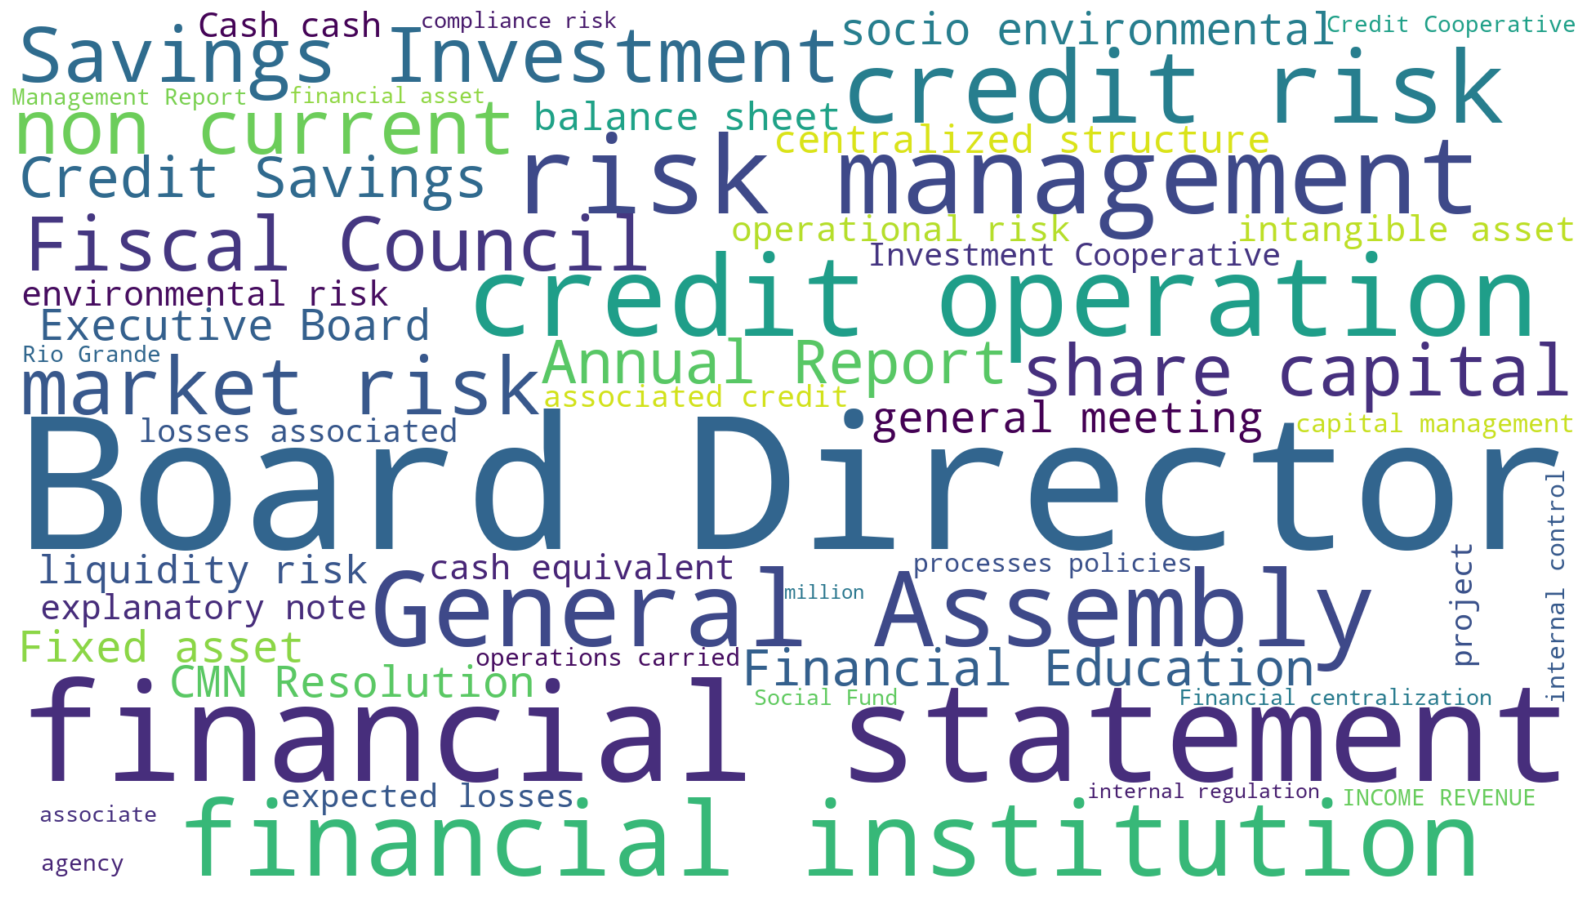

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenating all sentences without stopwords into a single string
all_sentences = ' '.join(df_sentences['sentence_without_stopwords'])

# Removing custom stopwords from the string
for word in custom_stopwords:
    all_sentences = all_sentences.replace(word, '')

# Generating the word cloud with Full HD resolution
wordcloud = WordCloud(width=1920, height=1080, background_color='white', colormap='viridis', max_font_size=300, max_words=50).generate(all_sentences)

# Plotting the word cloud with high quality and adding a white border
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Adjusting plot margins and padding to prevent cropping of words
plt.subplots_adjust(top=0.99, bottom=0.01, right=0.99, left=0.01)

plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig('wordcloud_fullhd.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)

plt.show()


In [83]:
# Importar pandas e a lista de palavras relacionadas
import pandas as pd

# Palavras relacionadas
related_words = ["women", "blacks", "minorities", "gender equality", "gender", "racial",
    "racial inclusion",
]

# Filtrar o DataFrame para incluir apenas as frases que contenham as palavras relacionadas
selected_sentences = df_sentences[df_sentences['sentence'].str.contains('|'.join(related_words))]

# Exibir as frases na tela
for index, row in selected_sentences.iterrows():
    print(row['sentence'])




Check out how the Youth and Women Committee Meeting went in 2022 by scanning this QR Code28Annual Report 2022 Sicredi Agroempresarial PR/SP The Women's Committee exists to promote equity in gender, the empowerment and training of women so that they can increasingly assume leading and leadership roles in cooperatives and communities.
More than 2,500 women participate in the Women in Brazil Committee, in more than 40 committees formed by cooperatives in eight states.
Sicredi gives a voice and a place to us, women, focusing on creating a space of our own with lectures, courses and experiences to train female leaders.
With the Social Fund we can contribute to projects that have already positively impacted society and thus, aligning our interest in the community with the initiative of men and women who make a difference, we cooperate for a better world.
Eliza Brierley First woman to join a cooperative, 82 years before women gained the right to vote.
“Much more than the celebration of 40 yea